When I extended the $\bar{\lambda}$ space in my stability scans, I noticed that for high $\epsilon$ values (~1) when moving along the $\bar{\lambda}$ axis the sausage unstable region is followed by a susage stable region, this seems to be a oscillation. Below is one example plot.

Looking at the integration of $\xi$ and $\xi'$ the oscillating sausage stable / unstable regions may be related to a relativly long wavelength oscillation in $\xi'$. 

Looking at the Kadomtsev stability criterion for sausage stability of Z-pinches, which my results should approximate in the high $\bar{\lambda}$ limit, there is no indication that the oscillating sausage unstable region is physical.   

![long wavelength sausage oscillation example](long_wavelength_sausage_oscillation_example.png)

# Import libraries

In [1]:
#imports
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from copy import deepcopy

import sys
sys.path.append('..')
sys.path.append('../scipy_mod')

import numpy as np
from scipy.interpolate import splev
from scipy.integrate import ode

import equil_solver as es
import newcomb_simple as new
reload(new)
import lambda_k_plotting_simple as plot
reload(plot)

sns.set_style('whitegrid')
sns.set_context('notebook')

ImportError: libgfortran.so.1: cannot open shared object file: No such file or directory

# First I will plot a few examples at $\epsilon=1$ for varying skin current widths.

# Set up parameters for the profiles

In [2]:
#parameters
k_bar = 0.1
lambda_bar = 1.0 
xi_factor = 1.
magnetic_potential_energy_ratio = 1.
offset = 1e-3
suydam_end_offset = 1e-3
sing_search_points = 100
suppress_output = True
rtol = 1e-2
max_step = 1e-2
nsteps = 5e5
init_value = 1.
method = 'lsoda'
diagnose = True
stiff = True
use_jac = True
params = {'k': k_bar,
          'm': 0,
          'r_0': 0,
          'a': 1.,
          'b': 'infinity'}
profile_kwargs = {'epsilon': 1.,
                  'points_core': 50,
                  'points_skin': 50,
                  'points_transition': 50,
                  'core_radius_norm': 0.8,
                  'transition_width_norm': 0.05,
                  'skin_width_norm': 0.1}


# Here are the $\epsilon = 1$ current profiles, the total width of the skin region increases from left to right

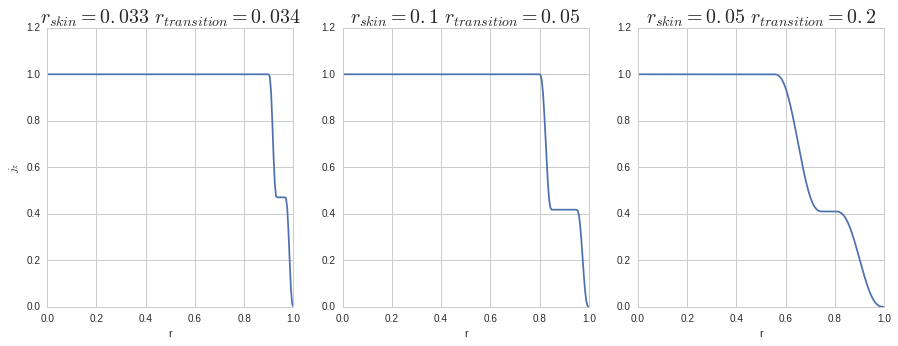

In [3]:
fig = plt.figure(figsize=(15,5))
profile_kwargs = {'epsilon': 1.,
                  'points_core': 50,
                  'points_skin': 50,
                  'points_transition': 50,
                  'core_radius_norm': 0.9,
                  'transition_width_norm': 0.033,
                  'skin_width_norm': 0.034}
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
splines1 = profile.get_tck_splines()


profile_kwargs = {'epsilon': 1.,
                  'points_core': 50,
                  'points_skin': 50,
                  'points_transition': 50,
                  'core_radius_norm': 0.8,
                  'transition_width_norm': 0.05,
                  'skin_width_norm': 0.1}
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)

splines2 = profile.get_tck_splines()


profile_kwargs = {'epsilon': 1.,
                  'points_core': 50,
                  'points_skin': 50,
                  'points_transition': 50,
                  'core_radius_norm': 0.55,
                  'transition_width_norm': 0.2,
                  'skin_width_norm': 0.05}
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
splines3 = profile.get_tck_splines()


r = np.linspace(0, 1, 200)

plt.subplot(1, 3, 1)
plt.title(r'$r_{skin}= 0.033$ $r_{transition}=0.034$', size=20)
plt.plot(r, splev(r, splines1['j_z']))
plt.xlabel('r')
plt.ylabel(r'$j_{z}$')

plt.subplot(1, 3, 2)
plt.title(r'$r_{skin}= 0.1$ $r_{transition}=0.05$', size=20)
plt.plot(r, splev(r, splines2['j_z']))
plt.xlabel('r')

plt.subplot(1, 3, 3)
plt.title(r'$r_{skin}=0.05$ $r_{transition}=0.2$', size=20)
plt.plot(r, splev(r, splines3['j_z']))
plt.xlabel('r')

plt.show()

# Here is the sausage stability maps. The sausage unstable regions become thinner as the skin current region becomes wider. 

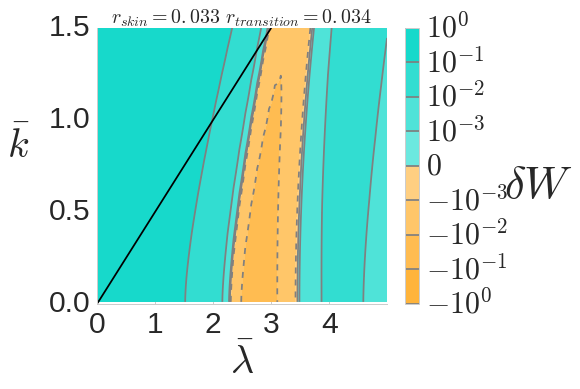

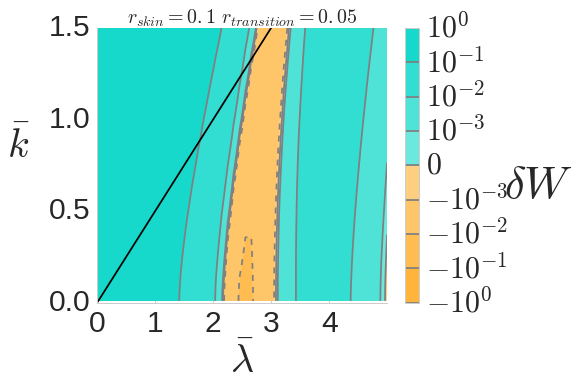

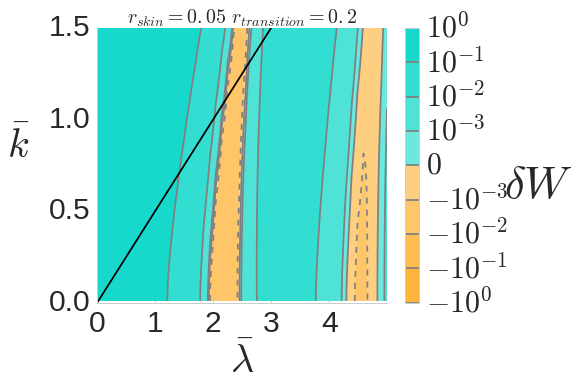

In [4]:
plt.title(r'$r_{skin}= 0.033$ $r_{transition}=0.034$', size=20)
plot.plot_lambda_k_space_dw('../../output/2016-02-06-18-40/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            norm=True, analytic_compare=False,
                            log=True,
                            label_pos=None,
                            interpolate=False,
                            bounds=(1.5, 5))

plt.title(r'$r_{skin}= 0.1$ $r_{transition}=0.05$', size=20)
plot.plot_lambda_k_space_dw('../../output/2016-03-05-10-00/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            norm=True, analytic_compare=False,
                            log=True,
                            label_pos=None,
                            interpolate=False,
                            bounds=(1.5, 5))

plt.title(r'$r_{skin}=0.05$ $r_{transition}=0.2$', size=20)
plot.plot_lambda_k_space_dw('../../output/2016-03-05-21-47/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            norm=True, analytic_compare=False,
                            log=True,
                            label_pos=None,
                            interpolate=False,
                            bounds=(1.5, 5))

# At lower epsilon the sausage untable regions merge into one large continous region

# $\epsilon = 0.5$ with $r_{skin}=0.1$ and $r_{transition}=0.05$

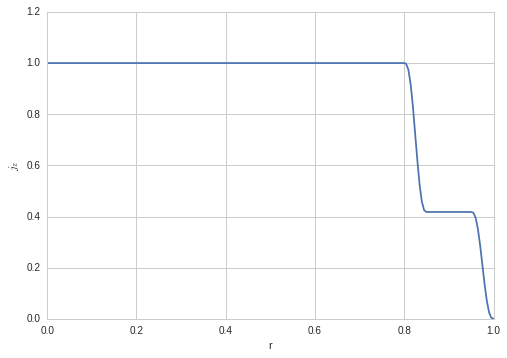

In [5]:
profile_kwargs = {'epsilon': 1.,
                  'points_core': 50,
                  'points_skin': 50,
                  'points_transition': 50,
                  'core_radius_norm': 0.8,
                  'transition_width_norm': 0.05,
                  'skin_width_norm': 0.1}
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
splines = profile.get_tck_splines()
r = np.linspace(0, 1, 200)
plt.plot(r, splev(r, splines['j_z']))
plt.xlabel('r')
plt.ylabel(r'$j_{z}$')
plt.show()

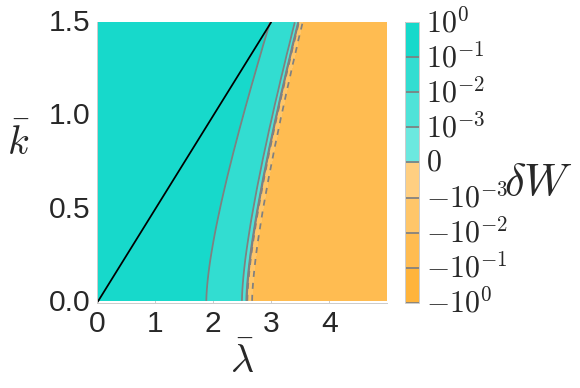

In [6]:
plot.plot_lambda_k_space_dw('../../output/2016-03-05-10-07/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            norm=True, analytic_compare=False,
                            log=True,
                            label_pos=None,
                            interpolate=False,
                            bounds=(1.5, 5))

## Let's look at profiles and $\xi$ integrations as the value of $\bar{\lambda}$ is increased for the $\epsilon=1$ with $r_{skin} = 0.1$ and $r_{transition}=0.05$

# Plot profiles

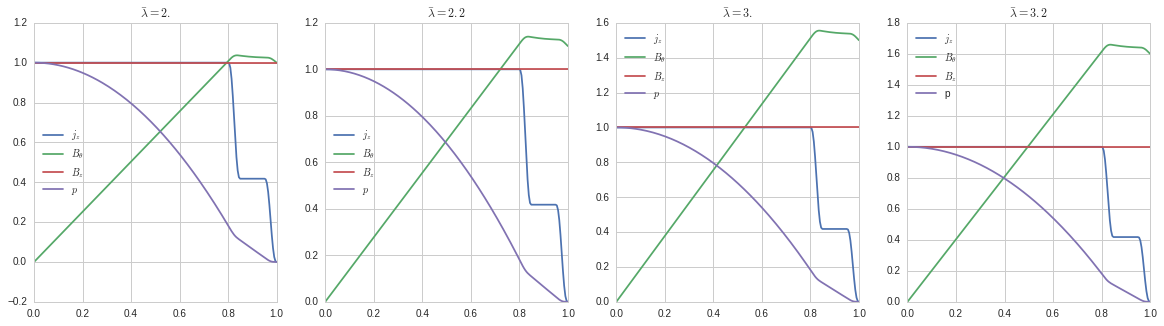

In [7]:
fig, axes = plt.subplots(1, 4, figsize=(20,5))

profile_kwargs = {'epsilon': 1.,
                  'points_core': 50,
                  'points_skin': 50,
                  'points_transition': 50,
                  'core_radius_norm': 0.8,
                  'transition_width_norm': 0.05,
                  'skin_width_norm': 0.1}
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
splines = profile.get_tck_splines()

r = np.linspace(0, 1, 200)

lambda_bar = 2.
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
splines = profile.get_tck_splines()
j_z = splev(r, splines['j_z'])
b_theta = splev(r, splines['b_theta'])
pressure = splev(r, splines['pressure'])
b_z = splev(r, splines['b_z'])
axes[0].plot(r, j_z, label=r'$j_z$')
axes[0].plot(r, b_theta, label=r'$B_{\theta}$')
axes[0].plot(r, b_z, label=r'$B_{z}$')
axes[0].plot(r, pressure, label=r'$p$')
axes[0].set_title(r'$\bar{\lambda} = 2.$')
axes[0].legend(loc='best')

lambda_bar = 2.2
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
splines = profile.get_tck_splines()
j_z = splev(r, splines['j_z'])
b_theta = splev(r, splines['b_theta'])
pressure = splev(r, splines['pressure'])
b_z = splev(r, splines['b_z'])
axes[1].plot(r, j_z, label=r'$j_z$')
axes[1].plot(r, b_theta, label=r'$B_\theta$')
axes[1].plot(r, b_z, label=r'$B_z$')
axes[1].plot(r, pressure, label=r'$p$')
axes[1].set_title(r'$\bar{\lambda} = 2.2$')
axes[1].legend(loc='best')

lambda_bar = 3.0
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
splines = profile.get_tck_splines()
j_z = splev(r, splines['j_z'])
b_theta = splev(r, splines['b_theta'])
pressure = splev(r, splines['pressure'])
b_z = splev(r, splines['b_z'])
axes[2].plot(r, j_z, label=r'$j_z$')
axes[2].plot(r, b_theta, label=r'$B_\theta$')
axes[2].plot(r, b_z, label=r'$B_z$')
axes[2].plot(r, pressure, label=r'$p$')
axes[2].set_title(r'$\bar{\lambda} = 3.$')
axes[2].legend(loc='best')


lambda_bar = 3.2
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
splines = profile.get_tck_splines()
j_z = splev(r, splines['j_z'])
b_theta = splev(r, splines['b_theta'])
pressure = splev(r, splines['pressure'])
b_z = splev(r, splines['b_z'])
axes[3].plot(r, j_z, label=r'$j_z$')
axes[3].plot(r, b_theta, label=r'$B_{\theta}$')
axes[3].plot(r, b_z, label=r'$B_{z}$')
axes[3].plot(r, pressure, label=r'p')
axes[3].set_title(r'$\bar{\lambda} = 3.2$')
axes[3].legend(loc='best')
plt.show()

We see in the profiles that as $\bar{\lambda}$ increases so does the dimensionless $\bar{B_{\theta}}$.
The non-dimensionalization is chosen so that all other quantities are normalized to 1.


$j_0 = j_{core}$


$\bar{B}_{\theta} = \frac{\mu_0 j_0 r_0}{B_0} \frac{\int{\bar{j}_z \bar{r} d\bar{r}}}{\bar{r}}$  Define constant $A = \frac{\mu_0 j_0 r_0}{B_0}$

$\frac{\partial \bar{p}}{\partial \bar{r}} = - \frac{\mu_0 j_0 r_0}{B_0} \bar{j}_z \bar{B}_{\theta} $


$\bar{p} = \frac{j_0 B_0 r_0}{p_0} \int_a^r{\bar{j}_z \bar{B}_{\theta} d\bar{r}}$ Define constant $B=\frac{j_0 B_0 r_0}{p_0}$


We can express A in terms of $\bar{\lambda}$ and the shape of $\bar{j}_z$: $A=\frac{\bar{\lambda} \bar{B}_z}{2\frac{ \int_0^a{\bar{j}_z}\bar{r} d\bar{r}}{a}}$

If we choose $p_0$ so that $\bar{p}(0)=1$, we force the constant $B$ to be $B=\frac{1}{\int_a^0{\bar{j}_z \bar{B}_\theta d\bar{r}}}$, so $B$ scales as the inverse of $A$.

Since $A$ scales as $\bar{\lambda}$, these choices mean that $\bar{B_{\theta}} \propto \bar{\lambda}$, $\bar{p}$ is independent of $\bar{\lambda}$, however, $\beta_0 \propto \bar{\lambda}^2$, and $q \propto \bar{k} / \bar{\lambda}$


# $\xi$ and $\xi'$ for the profiles

0.350719712367
-0.0325549625714
-0.0662595759798
0.167775313269


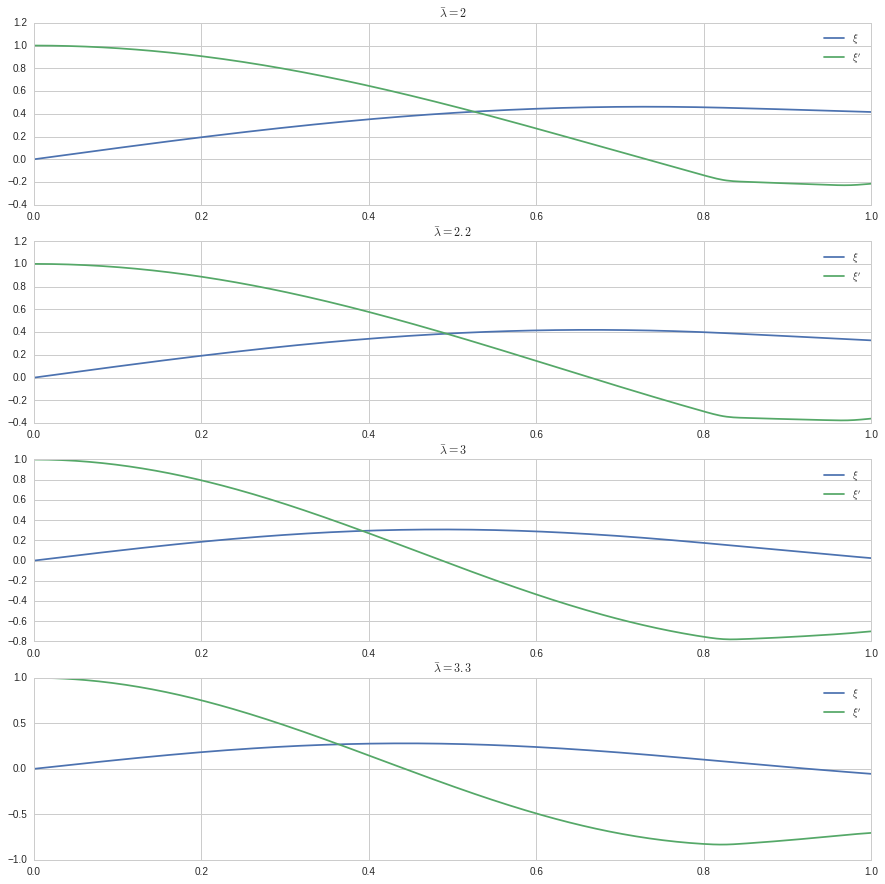

In [8]:
fig = plt.figure(figsize=(15,15))

lambda_bar = 2.
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

results = new.stability(params, offset, suydam_end_offset,
                        sing_search_points=sing_search_points,
                        suppress_output=suppress_output,
                        xi_given=init_value,
                        rtol=rtol, 
                        max_step=max_step,
                        nsteps=nsteps, 
                        method=method,
                        diagnose=diagnose, 
                        stiff=stiff,
                        use_jac=use_jac)
print results[2]

r = results[6]

plt.subplot(4, 1, 1)
plt.title(r'$\bar{\lambda}=2$')
plt.plot(r, results[4], label=r"$\xi$")
plt.plot(r, results[5], label=r"$\xi'$")
plt.legend()


lambda_bar = 2.2
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

results = new.stability(params, offset, suydam_end_offset,
                        sing_search_points=sing_search_points,
                        suppress_output=suppress_output,
                        xi_given=init_value,
                        rtol=rtol, 
                        max_step=max_step,
                        nsteps=nsteps, 
                        method=method,
                        diagnose=diagnose, 
                        stiff=stiff,
                        use_jac=use_jac)
print results[2]

r = results[6]
plt.subplot(4, 1, 2)
plt.title(r'$\bar{\lambda}=2.2$')
plt.plot(r, results[4], label=r"$\xi$")
plt.plot(r, results[5], label=r"$\xi'$")
plt.legend()

lambda_bar = 3.0
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

results = new.stability(params, offset, suydam_end_offset,
                        sing_search_points=sing_search_points,
                        suppress_output=suppress_output,
                        xi_given=init_value,
                        rtol=rtol, 
                        max_step=max_step,
                        nsteps=nsteps, 
                        method=method,
                        diagnose=diagnose, 
                        stiff=stiff,
                        use_jac=use_jac)
print results[2]

r = results[6]
plt.subplot(4, 1, 3)
plt.title(r'$\bar{\lambda}=3$')
plt.plot(r, results[4], label=r"$\xi$")
plt.plot(r, results[5], label=r"$\xi'$")
plt.legend()

lambda_bar = 3.3
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

results = new.stability(params, offset, suydam_end_offset,
                        sing_search_points=sing_search_points,
                        suppress_output=suppress_output,
                        xi_given=init_value,
                        rtol=rtol, 
                        max_step=max_step,
                        nsteps=nsteps, 
                        method=method,
                        diagnose=diagnose, 
                        stiff=stiff,
                        use_jac=use_jac)
print results[2]

r = results[6]
plt.subplot(4, 1, 4)
plt.title(r'$\bar{\lambda}=3.3$')
plt.plot(r, results[4], label=r"$\xi$")
plt.plot(r, results[5], label=r"$\xi'$")
plt.legend()
plt.show()

# There seems to be an oscillation, let's look at even higher $\bar{\lambda}$ values 

## $\bar{\lambda}=5$

-0.00953074584602


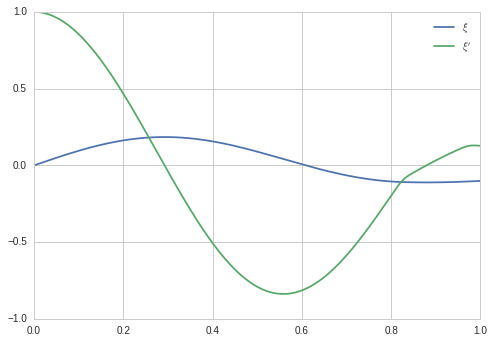

In [9]:
lambda_bar = 5
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

results = new.stability(params, offset, suydam_end_offset,
                        sing_search_points=sing_search_points,
                        suppress_output=suppress_output,
                        xi_given=init_value,
                        rtol=rtol, 
                        max_step=max_step,
                        nsteps=nsteps, 
                        method=method,
                        diagnose=diagnose, 
                        stiff=stiff,
                        use_jac=use_jac)
print results[2]

r = results[6]
plt.plot(r, results[4], label=r"$\xi$")
plt.plot(r, results[5], label=r"$\xi'$")
plt.legend()
plt.show()

## $\bar{\lambda}=10$

0.0368524245232


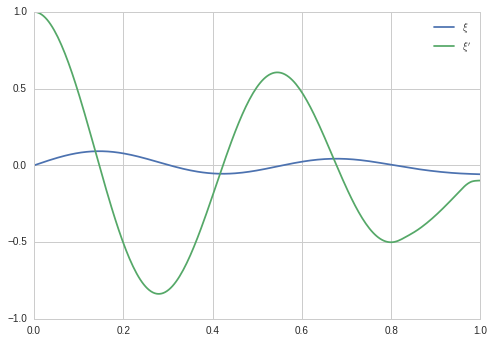

In [10]:
lambda_bar = 10
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

results = new.stability(params, offset, suydam_end_offset,
                        sing_search_points=sing_search_points,
                        suppress_output=suppress_output,
                        xi_given=init_value,
                        rtol=rtol, 
                        max_step=max_step,
                        nsteps=nsteps, 
                        method=method,
                        diagnose=diagnose, 
                        stiff=stiff,
                        use_jac=use_jac)
print results[2]

r = results[6]
plt.plot(r, results[4], label=r"$\xi$")
plt.plot(r, results[5], label=r"$\xi'$")
plt.legend()
plt.show()

## $\bar{\lambda}=50$

0.00303141788174


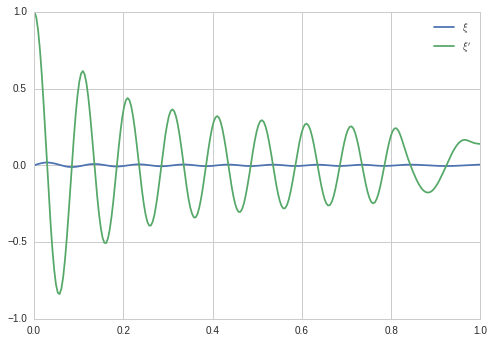

In [11]:
lambda_bar = 50
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

results = new.stability(params, offset, suydam_end_offset,
                        sing_search_points=sing_search_points,
                        suppress_output=suppress_output,
                        xi_given=init_value,
                        rtol=rtol, 
                        max_step=max_step,
                        nsteps=nsteps, 
                        method=method,
                        diagnose=diagnose, 
                        stiff=stiff,
                        use_jac=use_jac)
print results[2]

r = results[6]
plt.plot(r, results[4], label=r"$\xi$")
plt.plot(r, results[5], label=r"$\xi'$")
plt.legend()
plt.show()

# Look at Kadomtsev criterion

The Kadomtsev criterion for stability of a z-pinch against sausage modes is: 

$\frac{-r}{p} \frac{dp}{dr} < \frac{4 \Gamma}{\Gamma \beta + 2}$

In the plots below I plot the left and right hand sides. For the right side I set the ratio of specific heats $\Gamma = 1$.

The Kadomtsev criterion is for pure Z-pinches with no axial field, as $\bar{\lambda}$ becomes large it should be a better approximation.

In the plots below we see that the left side is always larger than the right side, so these profiles should be unstable to sausge modes.

In [12]:
lambda_bar = 2.
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

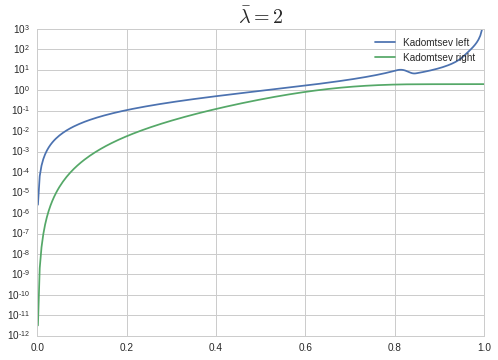

In [29]:
pressure = params['pressure']
p_prime = params['p_prime']
b_z = params['b_z']
b_theta = params['b_theta']


left = - r/(splev(r, pressure)) * splev(r, p_prime)

def j_z_r(r, y, j_z):
    return splev(r, j_z)*r

def j_z_b_theta_reverse(r, y, j_z, b_theta):
    r = 1 - r
    return splev(r, j_z)*splev(r, b_theta)

j_z_r_integrator = ode(j_z_r)
j_z_r_integrator.set_integrator('lsoda')
j_z_r_integrator.set_f_params(params['j_z'])
j_z_r_integrator.set_initial_value(0., t=0.)
integral_j_z_r = np.zeros(r.size)
for i, position in enumerate(r):
    integral_j_z_r[i] = j_z_r_integrator.integrate(position)

j_z_b_theta_integrator = ode(j_z_b_theta_reverse)
j_z_b_theta_integrator.set_integrator('lsoda')
j_z_b_theta_integrator.set_f_params(params['j_z'], params['b_theta'])
j_z_b_theta_integrator.set_initial_value(0., t=0.)
j_z_b_theta_reverse = np.empty(r.size)
j_z_b_theta_reverse[0] = 0.
r_reverse_diffs = np.cumsum(np.diff(r)[::-1])
for i, position in enumerate(r_reverse_diffs):
    if j_z_b_theta_integrator.successful():
        j_z_b_theta_integrator.integrate(position)
        j_z_b_theta_reverse[i+1] = j_z_b_theta_integrator.y
        
    integral_j_z_b_theta = j_z_b_theta_reverse[::-1]

beta = splev(r, pressure) / splev(r, b_theta)**2 * lambda_bar*splev(0, b_z)*1/(integral_j_z_r) * integral_j_z_b_theta

right = 4./(2. + beta)

plt.plot(r, left, label='Kadomtsev left')
plt.plot(r, right, label='Kadomtsev right')
plt.yscale('log')
plt.legend()
plt.title(r'$\bar{\lambda}=2$', size=20)
plt.show()

In [ ]:
lambda_bar = 2.2
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

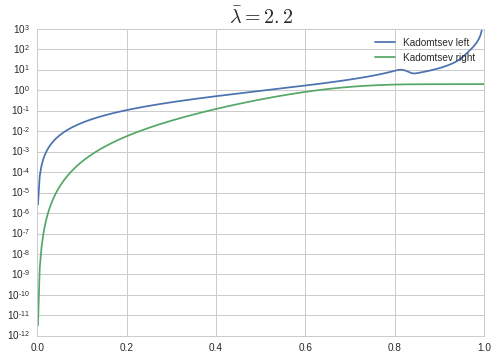

In [30]:
pressure = params['pressure']
p_prime = params['p_prime']
b_z = params['b_z']
b_theta = params['b_theta']


left = - r/(splev(r, pressure)) * splev(r, p_prime)

def j_z_r(r, y, j_z):
    return splev(r, j_z)*r

def j_z_b_theta_reverse(r, y, j_z, b_theta):
    r = 1 - r
    return splev(r, j_z)*splev(r, b_theta)

j_z_r_integrator = ode(j_z_r)
j_z_r_integrator.set_integrator('lsoda')
j_z_r_integrator.set_f_params(params['j_z'])
j_z_r_integrator.set_initial_value(0., t=0.)
integral_j_z_r = np.zeros(r.size)
for i, position in enumerate(r):
    integral_j_z_r[i] = j_z_r_integrator.integrate(position)

j_z_b_theta_integrator = ode(j_z_b_theta_reverse)
j_z_b_theta_integrator.set_integrator('lsoda')
j_z_b_theta_integrator.set_f_params(params['j_z'], params['b_theta'])
j_z_b_theta_integrator.set_initial_value(0., t=0.)
j_z_b_theta_reverse = np.empty(r.size)
j_z_b_theta_reverse[0] = 0.
r_reverse_diffs = np.cumsum(np.diff(r)[::-1])
for i, position in enumerate(r_reverse_diffs):
    if j_z_b_theta_integrator.successful():
        j_z_b_theta_integrator.integrate(position)
        j_z_b_theta_reverse[i+1] = j_z_b_theta_integrator.y
        
    integral_j_z_b_theta = j_z_b_theta_reverse[::-1]

beta = splev(r, pressure) / splev(r, b_theta)**2 * lambda_bar*splev(0, b_z)*1/(integral_j_z_r) * integral_j_z_b_theta

right = 4./(2. + beta)

plt.plot(r, left, label='Kadomtsev left')
plt.plot(r, right, label='Kadomtsev right')
plt.yscale('log')
plt.title(r'$\bar{\lambda}=2.2$', size=20)
plt.legend()

In [ ]:
lambda_bar = 3.0
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

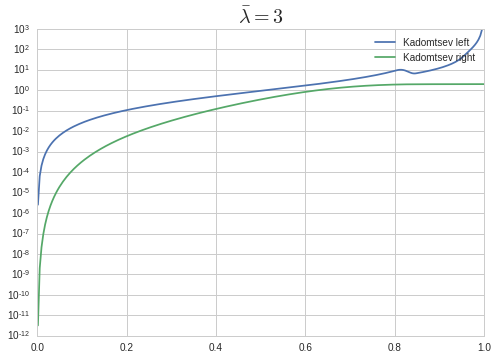

In [31]:
pressure = params['pressure']
p_prime = params['p_prime']
b_z = params['b_z']
b_theta = params['b_theta']


left = - r/(splev(r, pressure)) * splev(r, p_prime)

def j_z_r(r, y, j_z):
    return splev(r, j_z)*r

def j_z_b_theta_reverse(r, y, j_z, b_theta):
    r = 1 - r
    return splev(r, j_z)*splev(r, b_theta)

j_z_r_integrator = ode(j_z_r)
j_z_r_integrator.set_integrator('lsoda')
j_z_r_integrator.set_f_params(params['j_z'])
j_z_r_integrator.set_initial_value(0., t=0.)
integral_j_z_r = np.zeros(r.size)
for i, position in enumerate(r):
    integral_j_z_r[i] = j_z_r_integrator.integrate(position)

j_z_b_theta_integrator = ode(j_z_b_theta_reverse)
j_z_b_theta_integrator.set_integrator('lsoda')
j_z_b_theta_integrator.set_f_params(params['j_z'], params['b_theta'])
j_z_b_theta_integrator.set_initial_value(0., t=0.)
j_z_b_theta_reverse = np.empty(r.size)
j_z_b_theta_reverse[0] = 0.
r_reverse_diffs = np.cumsum(np.diff(r)[::-1])
for i, position in enumerate(r_reverse_diffs):
    if j_z_b_theta_integrator.successful():
        j_z_b_theta_integrator.integrate(position)
        j_z_b_theta_reverse[i+1] = j_z_b_theta_integrator.y
        
    integral_j_z_b_theta = j_z_b_theta_reverse[::-1]

beta = splev(r, pressure) / splev(r, b_theta)**2 * lambda_bar*splev(0, b_z)*1/(integral_j_z_r) * integral_j_z_b_theta

right = 4./(2. + beta)

plt.plot(r, left, label='Kadomtsev left')
plt.plot(r, right, label='Kadomtsev right')
plt.yscale('log')
plt.title(r'$\bar{\lambda}=3$', size=20)
plt.legend()

In [ ]:
lambda_bar = 3.3
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

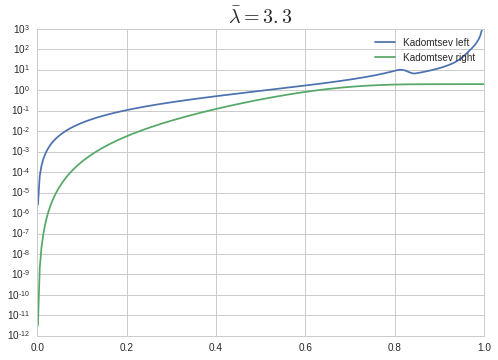

In [32]:
pressure = params['pressure']
p_prime = params['p_prime']
b_z = params['b_z']
b_theta = params['b_theta']


left = - r/(splev(r, pressure)) * splev(r, p_prime)

def j_z_r(r, y, j_z):
    return splev(r, j_z)*r

def j_z_b_theta_reverse(r, y, j_z, b_theta):
    r = 1 - r
    return splev(r, j_z)*splev(r, b_theta)

j_z_r_integrator = ode(j_z_r)
j_z_r_integrator.set_integrator('lsoda')
j_z_r_integrator.set_f_params(params['j_z'])
j_z_r_integrator.set_initial_value(0., t=0.)
integral_j_z_r = np.zeros(r.size)
for i, position in enumerate(r):
    integral_j_z_r[i] = j_z_r_integrator.integrate(position)

j_z_b_theta_integrator = ode(j_z_b_theta_reverse)
j_z_b_theta_integrator.set_integrator('lsoda')
j_z_b_theta_integrator.set_f_params(params['j_z'], params['b_theta'])
j_z_b_theta_integrator.set_initial_value(0., t=0.)
j_z_b_theta_reverse = np.empty(r.size)
j_z_b_theta_reverse[0] = 0.
r_reverse_diffs = np.cumsum(np.diff(r)[::-1])
for i, position in enumerate(r_reverse_diffs):
    if j_z_b_theta_integrator.successful():
        j_z_b_theta_integrator.integrate(position)
        j_z_b_theta_reverse[i+1] = j_z_b_theta_integrator.y
        
    integral_j_z_b_theta = j_z_b_theta_reverse[::-1]

beta = splev(r, pressure) / splev(r, b_theta)**2 * lambda_bar*splev(0, b_z)*1/(integral_j_z_r) * integral_j_z_b_theta

right = 4./(2. + beta)

plt.plot(r, left, label='Kadomtsev left')
plt.plot(r, right, label='Kadomtsev right')
plt.yscale('log')
plt.title(r'$\bar{\lambda}=3.3$', size=20)
plt.legend()

In [ ]:
lambda_bar = 5
profile = es.UnitlessSmoothedCoreSkin(k_bar=k_bar,
                                      lambda_bar=lambda_bar,
                                      **profile_kwargs)
params_wo_splines = deepcopy(params)
params.update(profile.get_tck_splines())
params.update({'xi_factor': xi_factor,
               'magnetic_potential_energy_ratio': magnetic_potential_energy_ratio,
               'beta_0': profile.beta_0(),
               'core_radius': profile.core_radius,
               'transition_width': profile.transition_width,
               'skin_width': profile.skin_width,
               'points_core': profile.points_core,
               'points_transition': profile.points_transition,
               'points_skin': profile.points_skin,
               'epsilon': profile.epsilon})

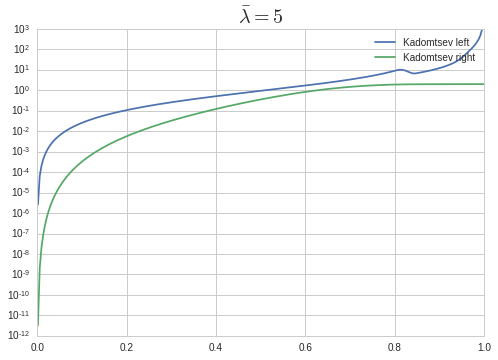

In [33]:
pressure = params['pressure']
p_prime = params['p_prime']
b_z = params['b_z']
b_theta = params['b_theta']


left = - r/(splev(r, pressure)) * splev(r, p_prime)

def j_z_r(r, y, j_z):
    return splev(r, j_z)*r

def j_z_b_theta_reverse(r, y, j_z, b_theta):
    r = 1 - r
    return splev(r, j_z)*splev(r, b_theta)

j_z_r_integrator = ode(j_z_r)
j_z_r_integrator.set_integrator('lsoda')
j_z_r_integrator.set_f_params(params['j_z'])
j_z_r_integrator.set_initial_value(0., t=0.)
integral_j_z_r = np.zeros(r.size)
for i, position in enumerate(r):
    integral_j_z_r[i] = j_z_r_integrator.integrate(position)

j_z_b_theta_integrator = ode(j_z_b_theta_reverse)
j_z_b_theta_integrator.set_integrator('lsoda')
j_z_b_theta_integrator.set_f_params(params['j_z'], params['b_theta'])
j_z_b_theta_integrator.set_initial_value(0., t=0.)
j_z_b_theta_reverse = np.empty(r.size)
j_z_b_theta_reverse[0] = 0.
r_reverse_diffs = np.cumsum(np.diff(r)[::-1])
for i, position in enumerate(r_reverse_diffs):
    if j_z_b_theta_integrator.successful():
        j_z_b_theta_integrator.integrate(position)
        j_z_b_theta_reverse[i+1] = j_z_b_theta_integrator.y
        
    integral_j_z_b_theta = j_z_b_theta_reverse[::-1]

beta = splev(r, pressure) / splev(r, b_theta)**2 * lambda_bar*splev(0, b_z)*1/(integral_j_z_r) * integral_j_z_b_theta

right = 4./(2. + beta)

plt.plot(r, left, label='Kadomtsev left')
plt.plot(r, right, label='Kadomtsev right')
plt.yscale('log')
plt.title(r'$\bar{\lambda}=5$', size=20)
plt.legend()